# IPL Cricket Dashboard

## Step 1: Data Preparation

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\madha\appdata\local\programs\python\python310\lib\site-packages (2.2.2)



You should consider upgrading via the 'c:\Users\madha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

each_ball_records_df = pd.read_csv('each_ball_records.csv')
each_match_records_df = pd.read_csv('each_match_records.csv')

In [4]:
check_top_5_each_ball = each_ball_records_df.head()
check_top_5_each_match = each_match_records_df.head()

check_top_5_each_ball, check_top_5_each_match

(   match_no  ballnumber  inningno  over outcome           batter  \
 0         1           1         1   0.1       0     Devon Conway   
 1         1           2         1   0.2     1lb     Devon Conway   
 2         1           3         1   0.3       0  Ruturaj Gaikwad   
 3         1           4         1   0.4       1  Ruturaj Gaikwad   
 4         1           5         1   0.5       0     Devon Conway   
 
            bowler                                     comment  score  
 0  Mohammed Shami     Mohammed Shami to Devon Conway, no run,      0  
 1  Mohammed Shami  Mohammed Shami to Devon Conway, 1 leg bye,      1  
 2  Mohammed Shami  Mohammed Shami to Ruturaj Gaikwad, no run,      0  
 3  Mohammed Shami   Mohammed Shami to Ruturaj Gaikwad, 1 run,      1  
 4  Mohammed Shami     Mohammed Shami to Devon Conway, no run,      0  ,
    season        date  match_number match_type  \
 0    2023  31-03-2023             1      Group   
 1    2023  01-04-2023             2      Group  

### Checking Type of columns

In [5]:
each_ball_records_df.info()
each_match_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_no    17863 non-null  int64  
 1   ballnumber  17863 non-null  int64  
 2   inningno    17863 non-null  int64  
 3   over        17863 non-null  float64
 4   outcome     17863 non-null  object 
 5   batter      17863 non-null  object 
 6   bowler      17863 non-null  object 
 7   comment     17863 non-null  object 
 8   score       17863 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          74 non-null     int64  
 1   date            74 non-null     object 
 2   match_number    74 non-null     int64  
 3   match_type      74 non-null     object 
 4   v

### checking Missing Values

In [6]:
print(each_match_records_df.isnull().sum())
print('========= Next ==========')
print(each_ball_records_df.isnull().sum())

season             0
date               0
match_number       0
match_type         0
venue              0
location           0
team1              0
team2              0
toss_won           0
toss_decision      0
umpire1            0
umpire2            0
reserve_umpire     0
match_referee      0
winner             0
winner_runs       34
winner_wickets    41
man_of_match       1
dtype: int64
========= Next ==========
match_no      0
ballnumber    0
inningno      0
over          0
outcome       0
batter        0
bowler        0
comment       0
score         0
dtype: int64


### Filling Missing Values

In [7]:
each_match_records_df.fillna({'winner_runs': 0, 'winner_wickets': 0, 'man_of_match': 'No Award'}, inplace=True)

### Handling Formats

In [8]:
each_match_records_df['date'] = pd.to_datetime(each_match_records_df['date'], format= '%d-%m-%Y')

### Verify Changes

In [9]:
print(each_match_records_df.info())
print(each_match_records_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          74 non-null     int64         
 1   date            74 non-null     datetime64[ns]
 2   match_number    74 non-null     int64         
 3   match_type      74 non-null     object        
 4   venue           74 non-null     object        
 5   location        74 non-null     object        
 6   team1           74 non-null     object        
 7   team2           74 non-null     object        
 8   toss_won        74 non-null     object        
 9   toss_decision   74 non-null     object        
 10  umpire1         74 non-null     object        
 11  umpire2         74 non-null     object        
 12  reserve_umpire  74 non-null     object        
 13  match_referee   74 non-null     object        
 14  winner          74 non-null     object        
 15  winner_r

## Step 2: Exploratory Data Analysis (EDA)

### Summary Statistics

In [10]:
match_summary_stats = each_match_records_df.describe()
ball_summary_stats = each_ball_records_df.describe()

match_categorical_counts = each_match_records_df.select_dtypes(include='object').apply(pd.Series.value_counts)
ball_categorical_counts = each_ball_records_df.select_dtypes(include='object').apply(pd.Series.value_counts)

match_summary_stats, ball_summary_stats, match_categorical_counts, ball_categorical_counts

(       season                           date  match_number  winner_runs  \
 count    74.0                             74     74.000000    74.000000   
 mean   2023.0  2023-04-27 06:09:43.783783680     37.500000    16.432432   
 min    2023.0            2023-03-31 00:00:00      1.000000     0.000000   
 25%    2023.0            2023-04-14 06:00:00     19.250000     0.000000   
 50%    2023.0            2023-04-27 12:00:00     37.500000     5.000000   
 75%    2023.0            2023-05-10 18:00:00     55.750000    23.000000   
 max    2023.0            2023-05-29 00:00:00     74.000000   112.000000   
 std       0.0                            NaN     21.505813    25.264671   
 
        winner_wickets  
 count       74.000000  
 mean         2.554054  
 min          0.000000  
 25%          0.000000  
 50%          0.000000  
 75%          6.000000  
 max          9.000000  
 std          3.132428  ,
            match_no    ballnumber      inningno          over         score
 count  178

### Distribution Analysis

#### Distribution of Matches Across Seasons and Venues

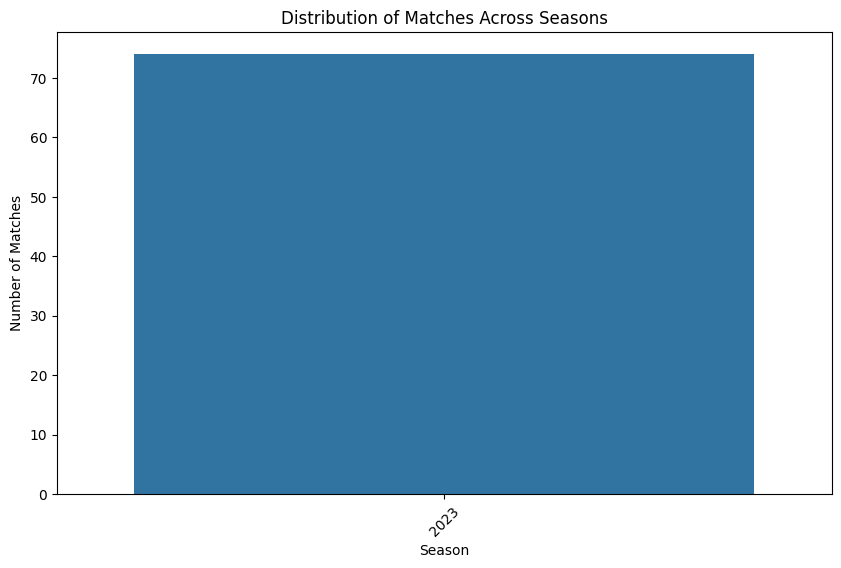

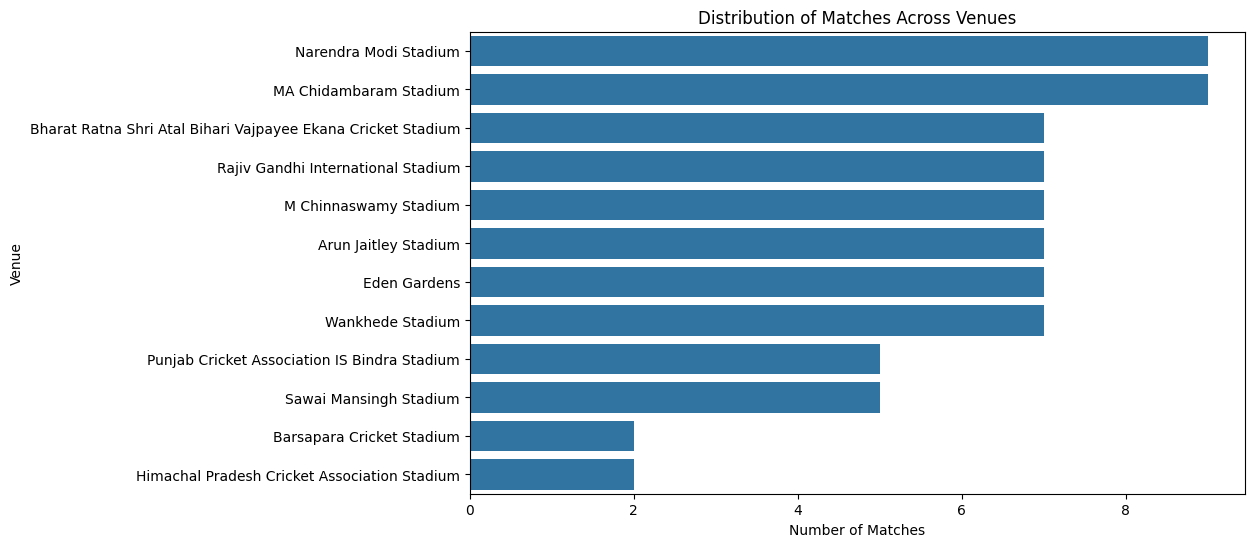

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of matches across seasons
plt.figure(figsize=(10, 6))
sns.countplot(data=each_match_records_df, x='season')
plt.title('Distribution of Matches Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

# Distribution of matches across venues
plt.figure(figsize=(10, 6))
sns.countplot(data=each_match_records_df, y='venue', order=each_match_records_df['venue'].value_counts().index)
plt.title('Distribution of Matches Across Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

#### Distribution of Runs Scored and Wickets Taken

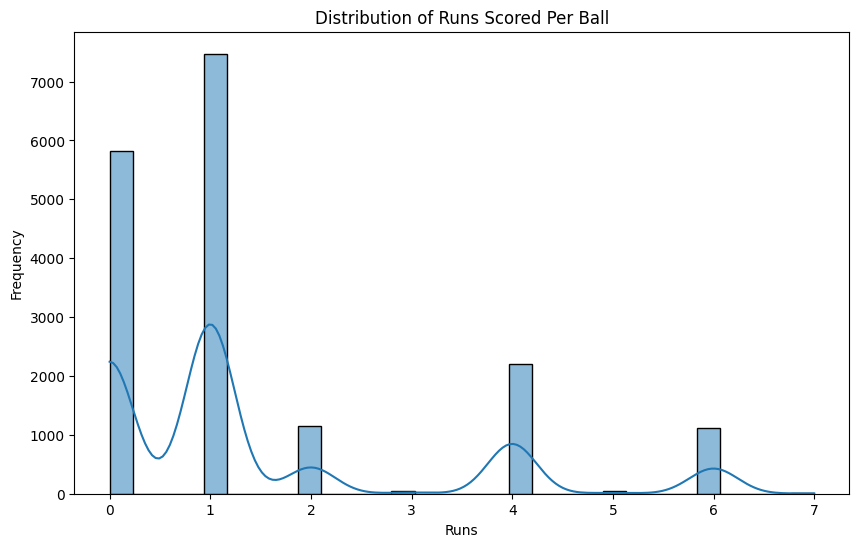

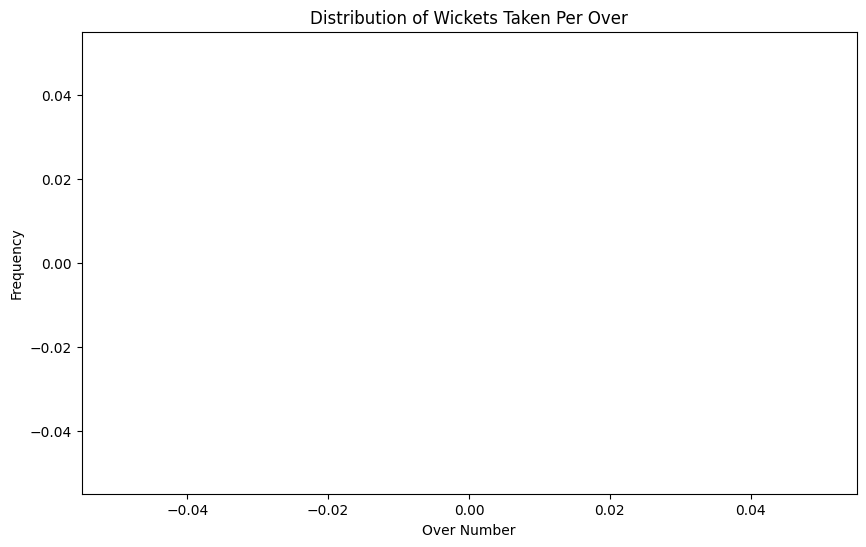

In [12]:
# Distribution of runs scored
plt.figure(figsize=(10, 6))
sns.histplot(each_ball_records_df['score'], bins=30, kde=True)
plt.title('Distribution of Runs Scored Per Ball')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# Distribution of wickets taken (assuming 'out' outcome means wicket taken)
if not each_ball_records_df['over'].dtype == 'object':
    each_ball_records_df['over'] = each_ball_records_df['over'].astype(str)
each_ball_records_df['over_number'] = each_ball_records_df['over'].str.split('.').str[0].astype(int)
wickets_df = each_ball_records_df[each_ball_records_df['outcome'].str.contains('out', case=False, na=False)]
plt.figure(figsize=(10, 6))
sns.histplot(wickets_df['over_number'], bins=20)
plt.title('Distribution of Wickets Taken Per Over')
plt.xlabel('Over Number')
plt.ylabel('Frequency')
plt.show()

### Toss Analysis

#### Outcomes of the Toss

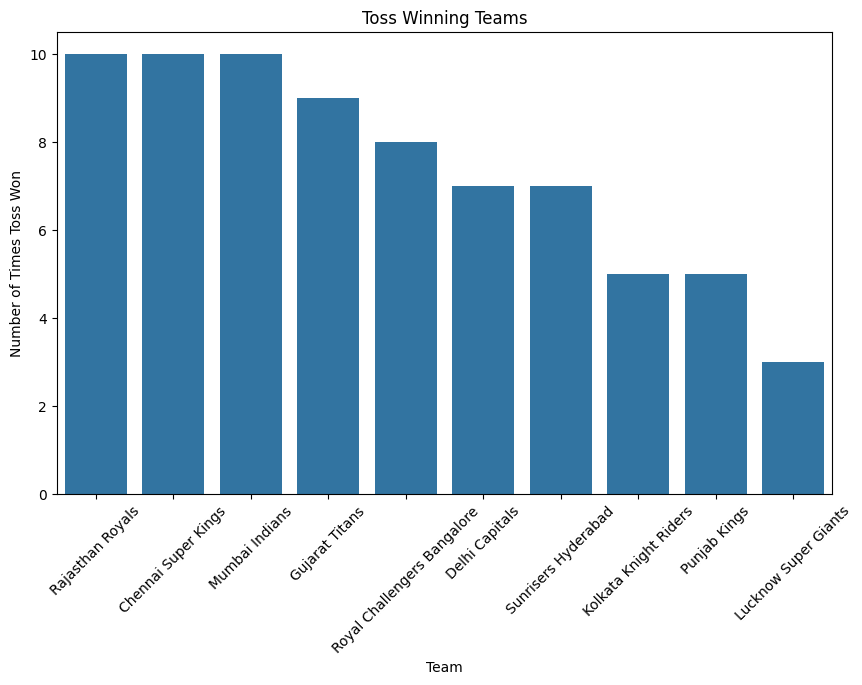

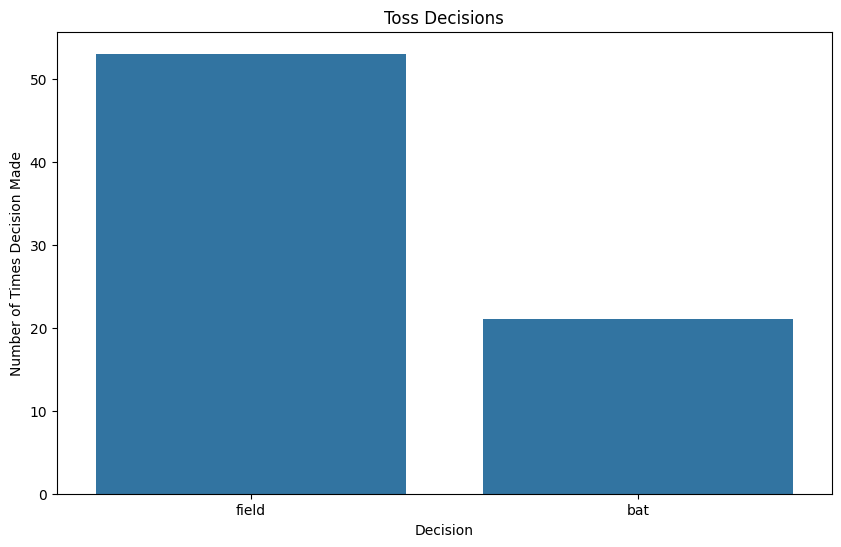

In [13]:
# Toss outcomes
toss_outcomes = each_match_records_df['toss_won'].value_counts()
toss_decisions = each_match_records_df['toss_decision'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=each_match_records_df, x='toss_won', order=toss_outcomes.index)
plt.title('Toss Winning Teams')
plt.xlabel('Team')
plt.ylabel('Number of Times Toss Won')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=each_match_records_df, x='toss_decision', order=toss_decisions.index)
plt.title('Toss Decisions')
plt.xlabel('Decision')
plt.ylabel('Number of Times Decision Made')
plt.show()

### Match Outcome Analysis

#### Match Outcomes and Win Margins

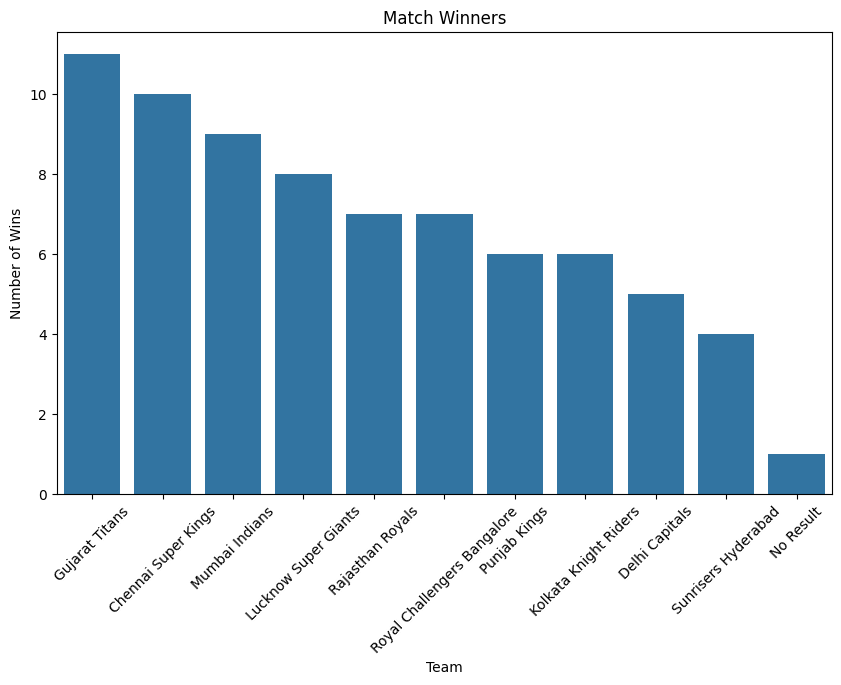

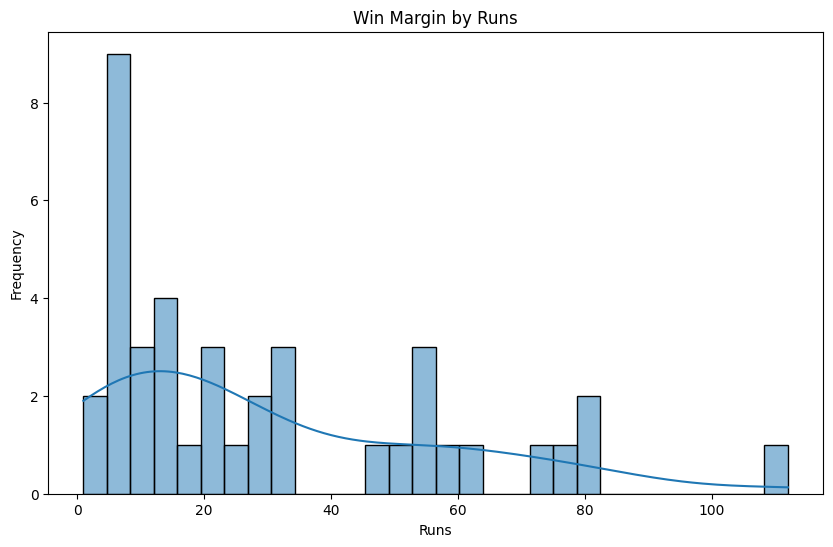

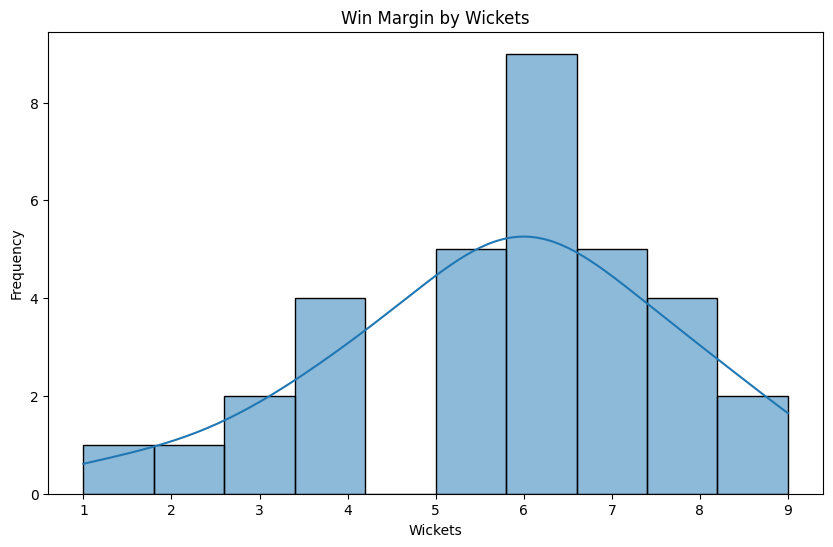

In [14]:
# Match outcomes
win_by_runs = each_match_records_df[each_match_records_df['winner_runs'] > 0]
win_by_wickets = each_match_records_df[each_match_records_df['winner_wickets'] > 0]

plt.figure(figsize=(10, 6))
sns.countplot(data=each_match_records_df, x='winner', order=each_match_records_df['winner'].value_counts().index)
plt.title('Match Winners')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(win_by_runs['winner_runs'], bins=30, kde=True)
plt.title('Win Margin by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(win_by_wickets['winner_wickets'], bins=10, kde=True)
plt.title('Win Margin by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()


### Player Performance Analysis

#### Top-Performing Batters and Bowlers

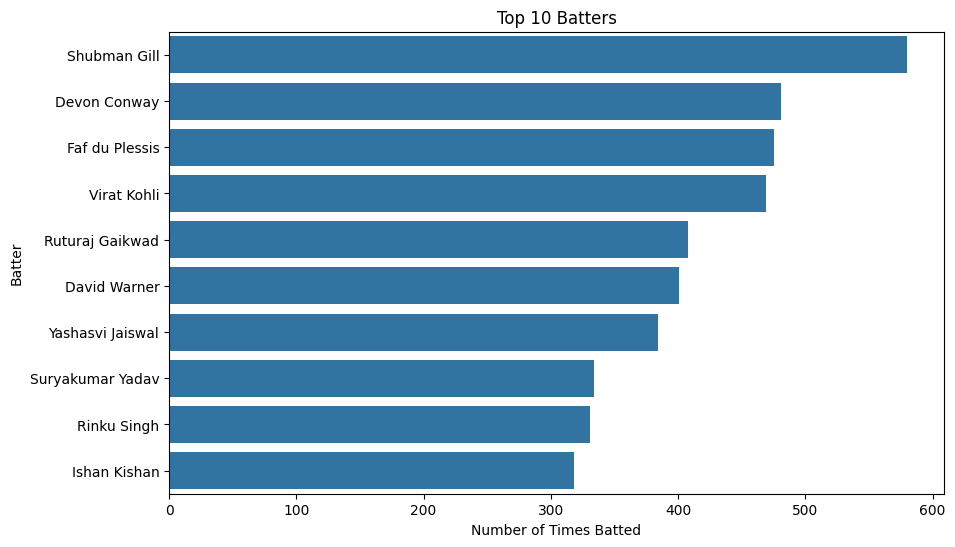

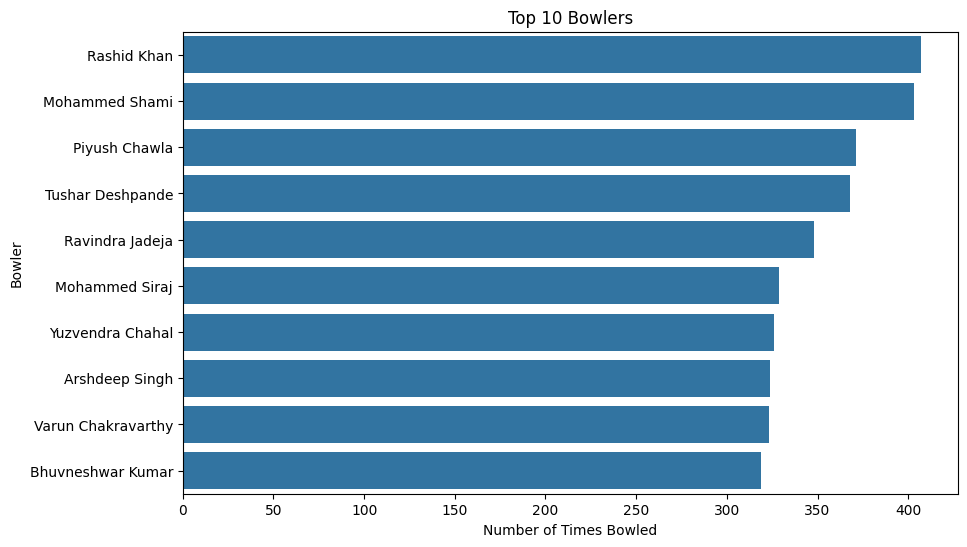

In [15]:
# Top batters
top_batters = each_ball_records_df['batter'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_batters.index, x=top_batters.values)
plt.title('Top 10 Batters')
plt.xlabel('Number of Times Batted')
plt.ylabel('Batter')
plt.show()

# Top bowlers
top_bowlers = each_ball_records_df['bowler'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_bowlers.index, x=top_bowlers.values)
plt.title('Top 10 Bowlers')
plt.xlabel('Number of Times Bowled')
plt.ylabel('Bowler')
plt.show()


### Ball-by-Ball Analysis

#### Distribution of Outcomes Per Ball

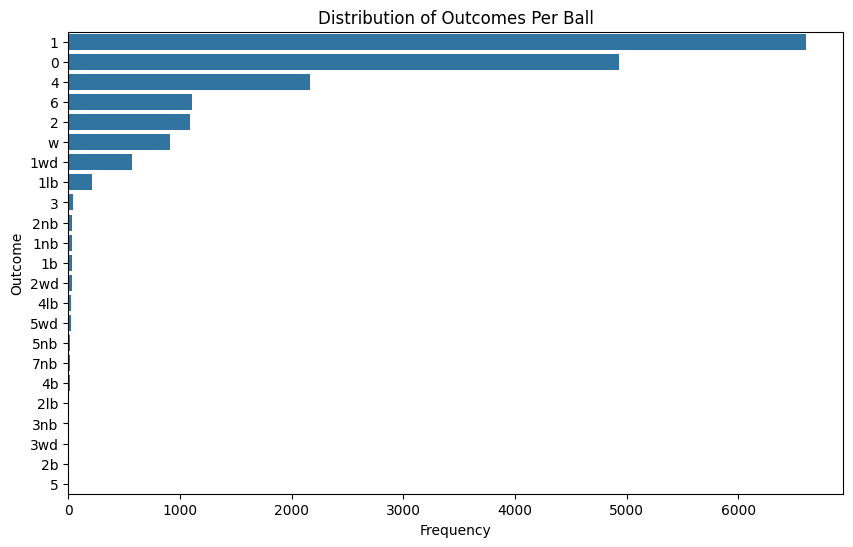

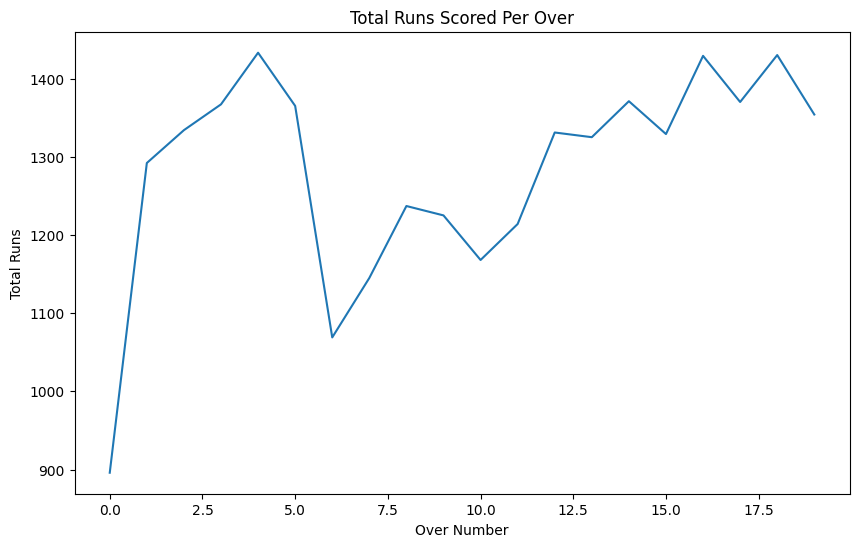

In [16]:
# Distribution of outcomes per ball
outcome_counts = each_ball_records_df['outcome'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=outcome_counts.index, x=outcome_counts.values)
plt.title('Distribution of Outcomes Per Ball')
plt.xlabel('Frequency')
plt.ylabel('Outcome')
plt.show()

# Trends over overs
each_ball_records_df['over_number'] = each_ball_records_df['over'].str.split('.').str[0].astype(int)
overs_summary = each_ball_records_df.groupby('over_number')['score'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=overs_summary.index, y=overs_summary.values)
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.show()

In [21]:
print(each_ball_records_df.columns)


Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score', 'over_number'],
      dtype='object')
